# Titanic Survival EDA

## Step 1: Install & Import Libraries

We begin by importing the essential Python libraries:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Seaborn & Matplotlib**: For data visualization.

These libraries allow us to load, explore, clean, and visualize the dataset efficiently.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Step 2: Upload CSV File

We're uploading the Titanic dataset (`train.csv`) provided by Kaggle. This dataset contains information on passengers including:

- Age, Gender, Passenger Class, etc.
- Whether they survived the disaster.

This step allows us to work with the dataset directly in Google Colab.


In [3]:
# Step 2: Upload CSV File
# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3: Getting to Know the Data


Here we explore the dataset structure using:

- `.head()` → View first few rows.
- `.info()` → Get data types and missing values.
- `.describe()` → Summary stats for numeric columns.
- `.isnull().sum()` → Count of missing values per column.

This helps us understand what kind of data we’re dealing with and what needs cleaning.


In [4]:
print(df.shape)
print(df.info())
df.describe()
df.isnull().sum()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Step 4: Data Cleaning



We clean the data to make it usable:

- **Missing Ages**: Replaced with the median age.
- **Missing Embarked Values**: Filled with the most common port (`mode`).
- **Cabin**: Dropped due to too many missing values.

Clean data is crucial for reliable analysis and visuals.

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-5-4085276496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-4085276496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## Step 5: Univariate Analysis

We analyze individual features to understand their distributions:

- **Survived**: Counts how many passengers survived vs. died.
- **Age**: Histogram of passenger ages.
- **Fare by Class**: Boxplot to see how fare differs by passenger class.

This helps in identifying patterns in survival, age, and ticket pricing.

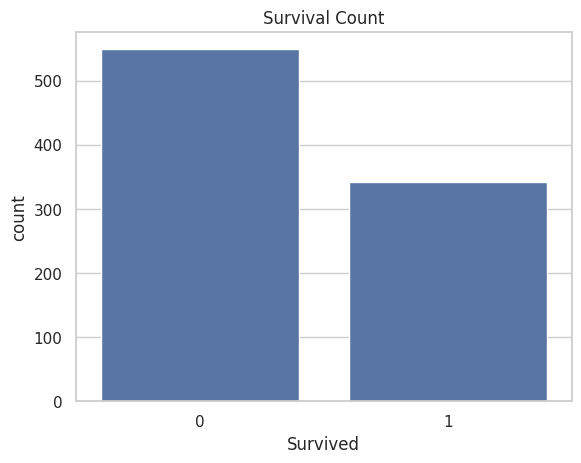

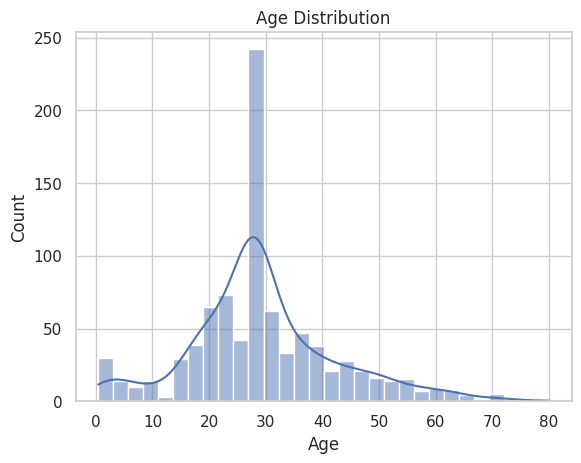

In [6]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


# Step 6: Bivariate Analysis (Two Features Together)

Here, we study the relationship between survival and other features:

- **Sex vs. Survival**: Compares male vs. female survival rates.
- **Class & Gender vs. Survival**: Combines class and gender to show combined effect on survival.

These visuals uncover that:
- Females had a significantly higher survival rate.
- 1st class passengers survived more often than 3rd class.

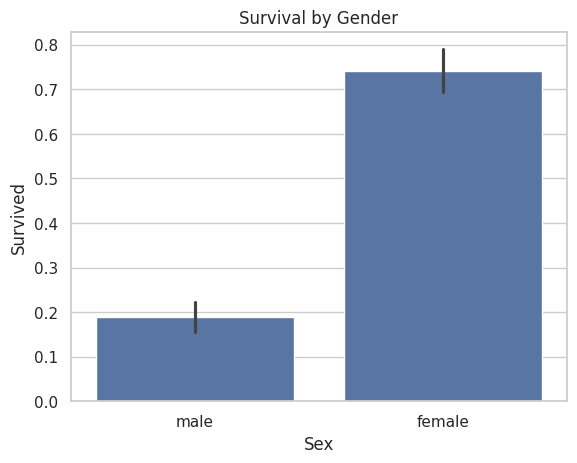

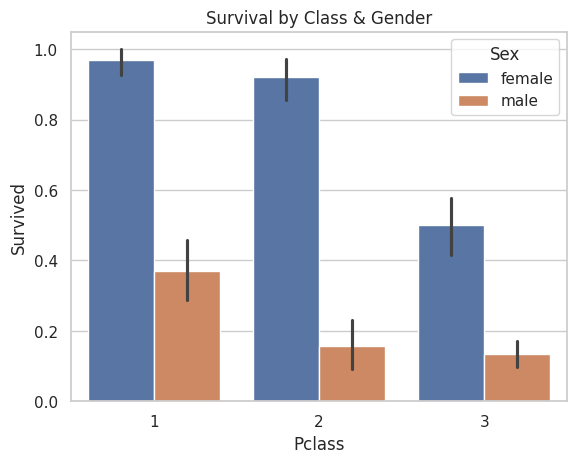

In [7]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival by Class & Gender")
plt.show()


# Step 7: Correlation Heatmap

We calculate the correlation between **numeric columns** using `.corr()`.

Then we use Seaborn's `heatmap()` to visualize:

- Which features are positively or negatively correlated.
- For example: Fare and Pclass are negatively correlated.

Only numeric columns are included, as string values (like names or tickets) can't be used for correlation.


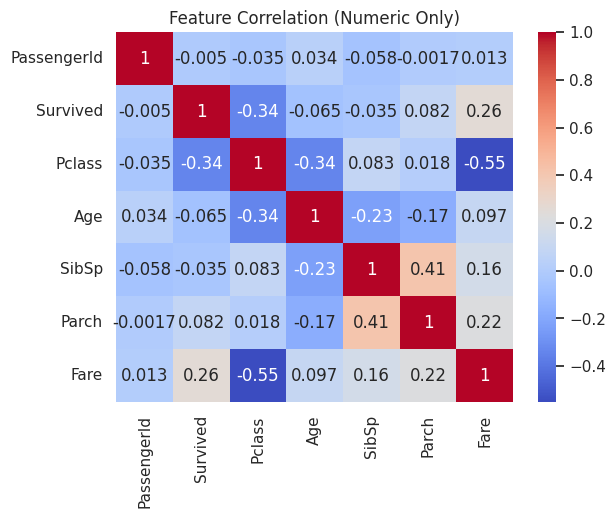

In [10]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Only)")
plt.show()


## Key Findings



The important insights discovered are:

- Females and first-class passengers had better survival rates.
- Age and Fare showed moderate influence on survival.
- Cabin data was mostly missing and removed.

These insights help build hypotheses for predictive modeling in the future.